# <u>**Pavement Condition Monitoring and Maintenance Prediction**</u>

##### As a data analyst for a city engineering office tasked with identifying which road segments require urgent maintenance. The office has collected inspection data on various roads, including surface conditions, traffic volume, and environmental factors.

##### The goal is to analyze this data and build a binary classification model to predict whether a given road segment needs maintenance, based on pavement and environmental indicators.</pre>

**Target Variable** : Needs_Maintenance
This binary label indicates whether the road segment requires immediate maintenance, defined by the following rule:

- Needs_Maintenance = 1

- Needs_Maintenance = 0 otherwise

**Libraries :** 
- Pandas

- Numpy

- Seaborn

- Matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### <u>**Data Dictionary**</u>

**Segment ID** : Unique identifier for the road segment

**PCI**	: Pavement Condition Index (0 = worst, 100 = best)

**Road Type** : Type of road (Primary, Secondary, Barangay)

**AADT** : Average Annual Daily Traffic

**Asphalt Type** : Asphalt mix classification (e.g. Dense, Open-graded, SMA)

**Last Maintenance** : Year of the last major maintenance

**Average Rainfall** : Average annual rainfall in the area (mm)

**Rutting** : Depth of rutting (mm)

**IRI** : International Roughness Index (m/km)

**Needs Maintenance** : Target label: 1 if urgent maintenance is needed, 0 otherwise

### Step1 : Load Dataset

In [2]:
df=pd.read_csv('ESC 12 Pavement Dataset.csv')
df

,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
0,SID 155440,70.00,Secondary,4634,Concrete,2022,42.07,15.11,0.68,0
1,SID 244365,37.87,Tertiary,3474,Asphalt,2017,79.60,19.67,0.99,1
2,SID 137867,88.32,Tertiary,1734,Concrete,2019,62.69,14.73,0.50,0
3,SID 540519,52.30,Tertiary,3119,Asphalt,2008,79.32,17.01,1.04,1
4,SID 745776,49.10,Tertiary,3505,Asphalt,2019,71.81,21.08,1.18,1
...,...,...,...,...,...,...,...,...,...,...
1049995,SID 766608,60.37,Tertiary,2048,Concrete,2018,62.95,11.60,0.52,0
1049996,SID 594559,89.70,Secondary,3792,Concrete,2019,54.06,13.06,0.58,0
1049997,SID 345069,75.59,Secondary,33876,Concrete,2019,54.52,16.78,0.53,0
1049998,SID 472153,89.31,Tertiary,259,Asphalt,2025,63.54,16.07,0.70,0


**Information About Dataset**

- Column : All the Columns present in dataset

- Non-Null Count : Count of Non Null Values

- Dtype : Datatype of values inside the Columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Segment ID         1050000 non-null  object 
 1   PCI                1050000 non-null  float64
 2   Road Type          1050000 non-null  object 
 3   AADT               1050000 non-null  int64  
 4   Asphalt Type       1050000 non-null  object 
 5   Last Maintenance   1050000 non-null  int64  
 6   Average Rainfall   1050000 non-null  float64
 7   Rutting            1050000 non-null  float64
 8   IRI                1050000 non-null  float64
 9   Needs Maintenance  1050000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 80.1+ MB


**Short Summary of Data**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCI,1050000.0,54.707435,28.776743,0.00,29.98,55.02,80.07,100.00
AADT,1050000.0,11556.826428,13890.917677,-19313.00,2288.00,5307.00,16441.00,200150.00
Last Maintenance,1050000.0,2018.146516,4.984028,1959.00,2017.00,2019.00,2021.00,2028.00
Average Rainfall,1050000.0,64.981924,18.028552,0.00,49.96,64.97,80.03,129.84
Rutting,1050000.0,16.591940,2.891353,7.22,14.00,17.03,19.20,24.09
IRI,1050000.0,0.850080,0.236678,-0.28,0.69,0.85,1.01,1.91
Needs Maintenance,1050000.0,0.499875,0.500000,0.00,0.00,0.00,1.00,1.00


*Note : As you in data summary(desciption) AADT and IRI has min value as -19313 and -0.28 respectively which is note correct as minimum value for AADT and IRI is 0.0, hence data has serious Outliers(Noices). Also Last maintenance column which has maximum value 2028 and as currently we are in 2025, A road maintained in 2028 is not possible, Hence Last Maintenance column also has Outliers(Noice).*

**Checking Proportiontion of Road type, Asphalt Type and Needs Maintenance**

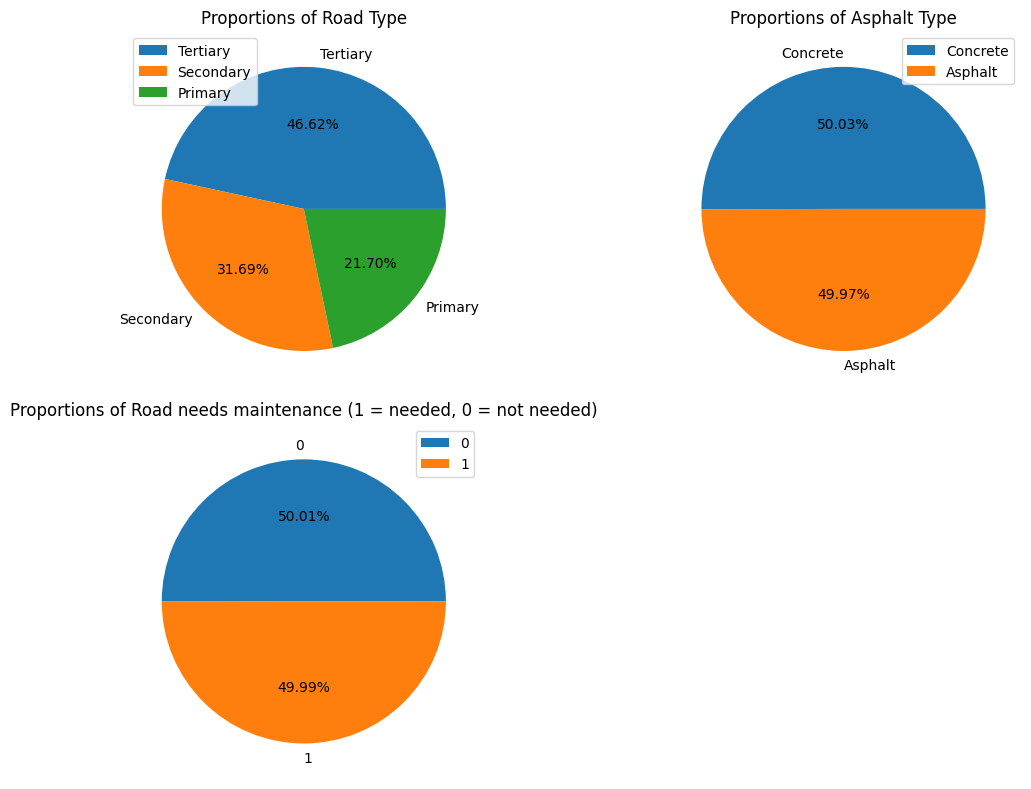

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.pie(df["Road Type"].value_counts(normalize=True),autopct='%1.2f%%',labels=df['Road Type'].value_counts().index)
plt.legend(df['Road Type'].value_counts().index)
plt.title('Proportions of Road Type')
plt.tight_layout()
plt.subplot(2,2,2)
plt.pie(df["Asphalt Type"].value_counts(normalize=True),autopct='%1.2f%%',labels=df['Asphalt Type'].value_counts().index)
plt.legend(df['Asphalt Type'].value_counts().index)
plt.title('Proportions of Asphalt Type')
plt.tight_layout()
plt.subplot(2,2,3)
plt.pie(df['Needs Maintenance'].value_counts(normalize=True),autopct='%1.2f%%',labels=df['Needs Maintenance'].value_counts().index)
plt.legend(df['Needs Maintenance'].value_counts().index,loc='upper right')
plt.title('Proportions of Road needs maintenance (1 = needed, 0 = not needed)')
plt.tight_layout()
plt.show()

In [6]:
df["Asphalt Type"].value_counts(normalize=True)

Asphalt Type
Concrete    0.50028
Asphalt     0.49972
Name: proportion, dtype: float64

In [7]:
df['Needs Maintenance'].value_counts(normalize=True)

Needs Maintenance
0    0.500125
1    0.499875
Name: proportion, dtype: float64

In [8]:
df['Last Maintenance'].unique()

array([2022, 2017, 2019, 2008, 2023, 2024, 2020, 2021, 2018, 2025, 2016,
       2012, 2013, 2015, 2011, 2007, 2010, 2005, 2001, 2009, 2014, 2002,
       2006, 2000, 2003, 1999, 1997, 2004, 1998, 1992, 1988, 1995, 1994,
       1996, 1993, 1984, 1981, 1987, 1983, 1991, 1973, 1990, 1986, 2026,
       1989, 1985, 1978, 1979, 2027, 1980, 1982, 1976, 1975, 1974, 1972,
       1970, 1962, 2028, 1966, 1977, 1965, 1967, 1959, 1963], dtype=int64)

**Box plot for Checking Distribution of Numerical Data.**

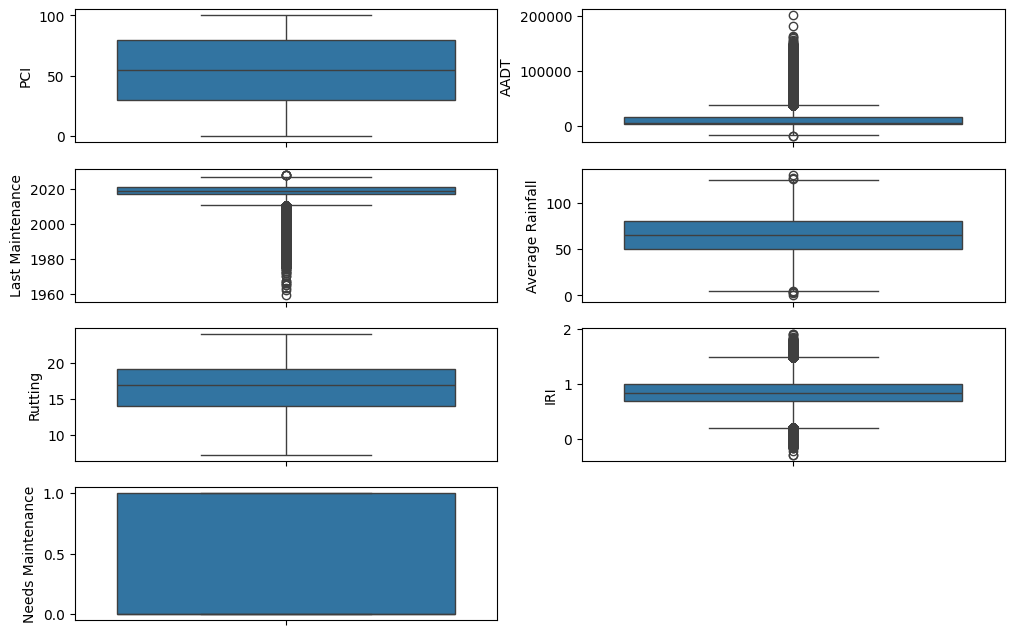

In [9]:
plt.figure(figsize=(12,10))
for i,val in enumerate(df.describe().columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[val])
plt.show()

**Dist plot for Checking Distribution of Numerical Data.**

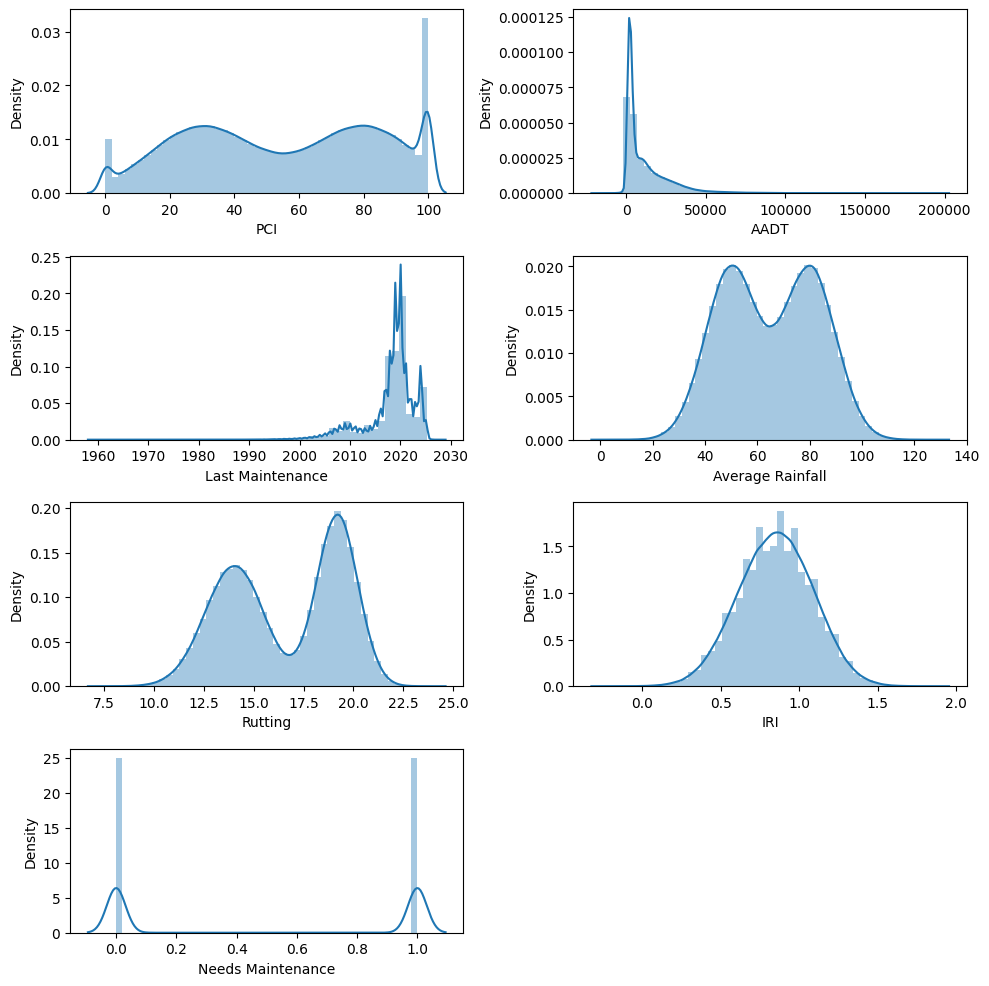

In [10]:
plt.figure(figsize=(10,12))
for i,val in enumerate(df.describe().columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[val])
    plt.tight_layout()
plt.show()